<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/15.%20NN/4_BackPropagation_for_One_unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

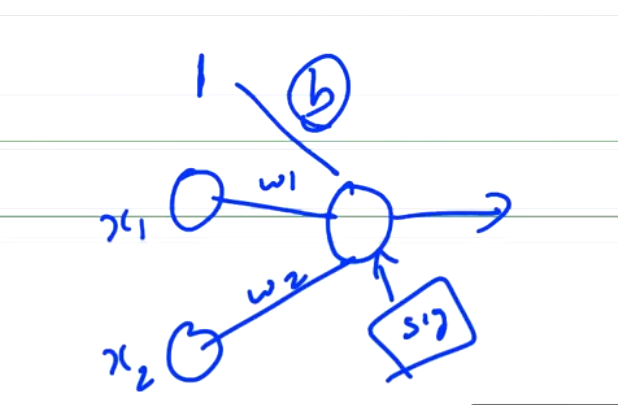

In [1]:
import numpy as np

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0,0,0,1]]).T
X.shape,Y.shape

((4, 2), (4, 1))

In [3]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [31]:
weights = 2 * np.random.random((2,1)) - 1 
bias = 2 * np.random.random((1,1)) - 1 
lr = 0.1
weights,bias #bcz no of params are 3. 2:w, 1:c

(array([[0.45223396],
        [0.77150531]]), array([[-0.36379587]]))

In [5]:
def derivativeSig(z):
  a = sigmoid(z)
  return a*(1-a)

In [28]:
## for loops
for iter in range(10000):
  # forward prop
  inputLayer = X
  outputLayer = sigmoid(np.dot(inputLayer,weights) + bias) # there is no hidden layer bcz it is just for one unit in NN. 

  # back prop
  first_term = outputLayer - Y
  input_to_outputLayer = np.dot(inputLayer,weights) + bias
  second_term = derivativeSig(input_to_outputLayer)
  first_two = first_term*second_term

  changes = np.zeros_like(weights)
  bias_changes = np.zeros_like(bias)

  for i in range(2): # bcz 2 features hai. x1,x2
    for j in range(4): # bcz 4 rows hai
      changes[i][0] += first_two[j][0] * inputLayer[j][i]
  weights -= lr*changes

  for i in range(1): # bcz 1 bias hai. b1
    for j in range(4): # bcz 4 rows hai
      bias_changes[i][0] += first_two[j][0] * 1
  bias -= lr*bias_changes

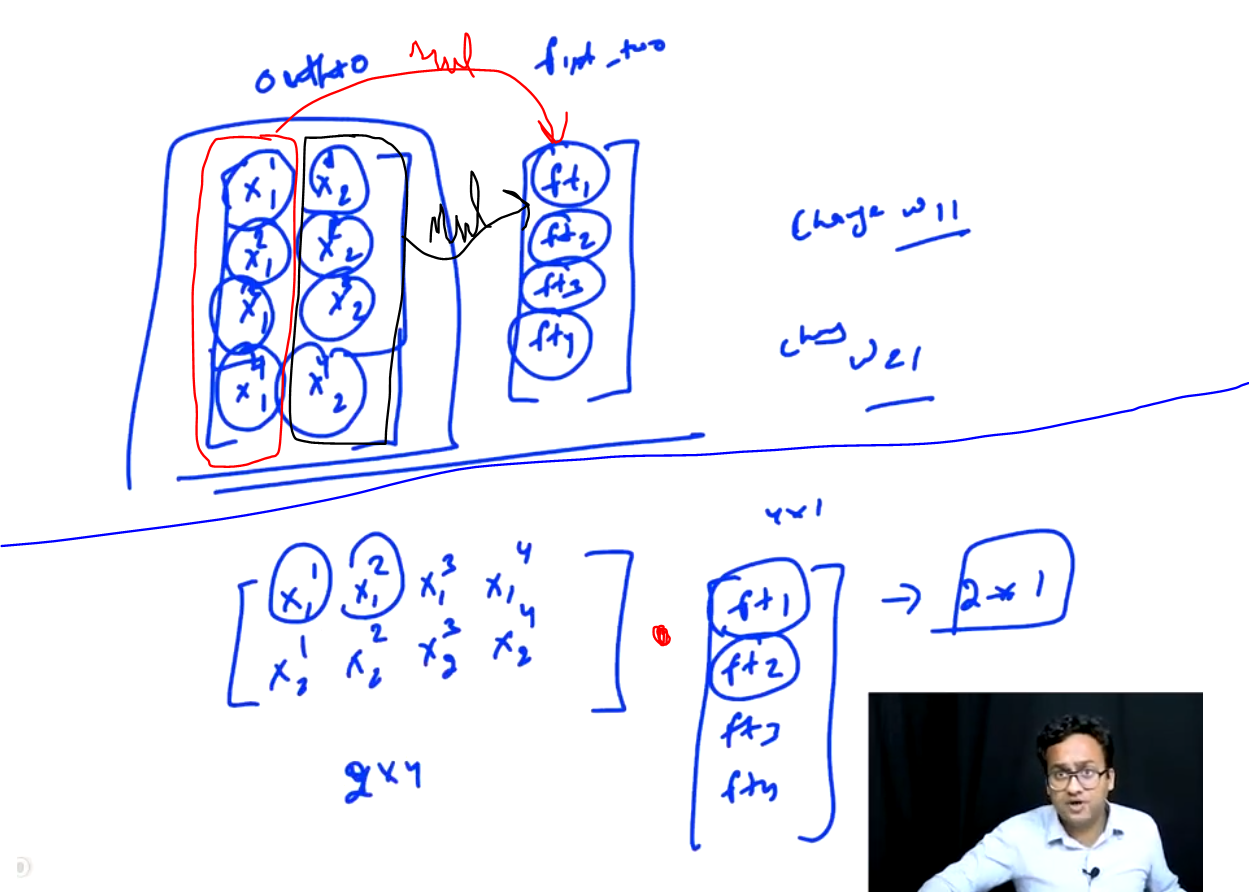

In [32]:
## Vectorization
for iter in range(10000):
  # forward prop
  inputLayer = X
  outputLayer = sigmoid(np.dot(inputLayer,weights) + bias) # there is no hidden layer bcz it is just for one unit in NN. 

  # back prop
  first_term = outputLayer - Y
  input_to_outputLayer = np.dot(inputLayer,weights) + bias
  second_term = derivativeSig(input_to_outputLayer)
  first_two = first_term*second_term

  changes = np.dot(inputLayer.T,first_two)
  bias_changes = np.sum(first_two)

  weights -= lr*changes
  bias -= lr*bias_changes

In [33]:
out = sigmoid(np.dot(X,weights) + bias)
weights,bias

(array([[5.48381314],
        [5.48381315]]), array([[-8.31839236]]))

In [34]:
out

array([[2.43928278e-04],
       [5.54839330e-02],
       [5.54839326e-02],
       [9.33963758e-01]])